# Tarefa 02: Diferenças entre AdaBoost e Gradient Boosting Machine (GBM)

Embora ambos pertençam à família de algoritmos de **Boosting** e treinem modelos de forma sequencial, o AdaBoost e o GBM possuem filosofias de otimização e construção significativamente diferentes.

---

## 1. As 5 Principais Diferenças

### 1. Método de Correção de Erros
* **AdaBoost:** Corrige os erros aumentando o **peso das amostras** que foram classificadas incorretamente. O próximo modelo é forçado a focar nos dados "mais pesados".
* **GBM:** Corrige os erros tentando prever os **resíduos (erros)** do modelo anterior. Ele utiliza o gradiente da função de perda para identificar onde o modelo precisa melhorar.



### 2. Complexidade dos Modelos Base (Weak Learners)
* **AdaBoost:** Tradicionalmente utiliza **Stumps** (árvores com apenas 1 nível de profundidade). O poder vem da soma de muitos modelos extremamente simples.
* **GBM:** Utiliza árvores de decisão mais complexas, geralmente com profundidade entre **3 e 8 níveis**. Isso permite que cada árvore capture relações mais sofisticadas entre as variáveis.

### 3. Votação Final e Agregação
* **AdaBoost:** O resultado final é uma **votação ponderada**. Modelos que tiveram maior acurácia durante o treino têm um "poder de voto" maior (*Amount of Say*).
* **GBM:** O resultado final é a **soma das previsões** de todas as árvores (multiplicada pela taxa de aprendizado). Não há pesos diferentes para as árvores no final; todas contribuem para reduzir o resíduo global.

### 4. Flexibilidade e Funções de Perda
* **AdaBoost:** É menos flexível, sendo otimizado principalmente para problemas de classificação através da minimização da perda exponencial.
* **GBM:** É altamente flexível. Pode ser usado para **Regressão, Classificação e Ranking**, permitindo que o usuário escolha diferentes funções de perda (como Erro Quadrático Médio ou Log-Loss) dependendo do problema.



### 5. Sensibilidade a Outliers
* **AdaBoost:** É extremamente **sensível a outliers**, pois o algoritmo continuará aumentando o peso de um dado discrepante indefinidamente na tentativa de acertá-lo, o que pode prejudicar o modelo todo.
* **GBM:** É mais robusto a ruídos e outliers, especialmente quando configurado com funções de perda mais estáveis (como a perda de Huber), pois ele foca no gradiente do erro em vez de apenas "dar mais peso" ao erro.

---

## 2. Tabela Resumo

| Característica | AdaBoost | GBM |
| :--- | :--- | :--- |
| **Foco** | Pesos das Amostras | Erros Residuais |
| **Arquitetura Base** | Stumps (Profundidade 1) | Árvores (Profundidade > 1) |
| **Decisão** | Votação Ponderada | Soma de Resíduos |
| **Sensibilidade a Outliers** | Alta | Moderada/Baixa |
| **Versatilidade** | Classificação | Classificação e Regressão |

------------

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [8]:
# ==========================================
# 1. EXEMPLO DE CLASSIFICAÇÃO COM GBM
# ==========================================
print("--- Iniciando Gradient Boosting Classifier ---")

# Carregando dados (Espécies de Flores)
iris = load_iris()
X_c, y_c = iris.data, iris.target
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

# Criando o modelo de classificação
# n_estimators: número de árvores
# learning_rate: contribuição de cada árvore para o resultado
# max_depth: profundidade da árvore (GBM usa > 1)
gbm_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_clf.fit(X_train_c, y_train_c)

# Avaliando
y_pred_c = gbm_clf.predict(X_test_c)
print(f"Acurácia (Classificação): {accuracy_score(y_test_c, y_pred_c):.2%}")

--- Iniciando Gradient Boosting Classifier ---
Acurácia (Classificação): 100.00%


In [10]:
# ==========================================
# 2. EXEMPLO DE REGRESSÃO COM GBM
# ==========================================
print("\n--- Iniciando Gradient Boosting Regressor ---")

# Carregando dados (Progressão da doença Diabetes - Valor numérico)
diabetes = load_diabetes()
X_r, y_r = diabetes.data, diabetes.target
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

# Criando o modelo de regressão
# Minizando o erro quadrático (MSE)
gbm_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_reg.fit(X_train_r, y_train_r)

# Avaliando
y_pred_r = gbm_reg.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"R² Score (Poder de explicação): {r2:.2%}")


--- Iniciando Gradient Boosting Regressor ---
Erro Quadrático Médio (MSE): 2898.44
R² Score (Poder de explicação): 45.29%


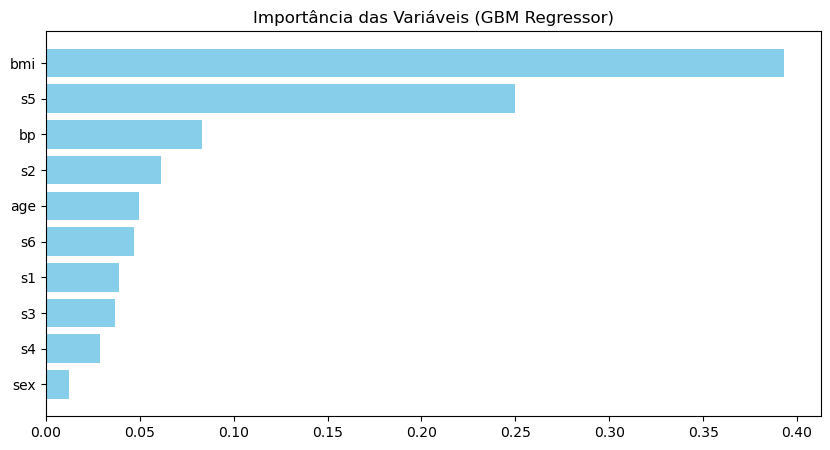

In [12]:
# ==========================================
# 3. VISUALIZAÇÃO: IMPORTÂNCIA DAS VARIÁVEIS
# ==========================================
feature_importance = gbm_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 5))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='skyblue')
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title('Importância das Variáveis (GBM Regressor)')
plt.show()

-------------------

# Hiperparâmetros Cruciais no Gradient Boosting Machine (GBM)

No GBM, o ajuste de hiperparâmetros é um exercício de equilíbrio: queremos um modelo que aprenda o máximo possível dos erros residuais, mas sem "decorar" o ruído dos dados. Abaixo estão os 5 principais parâmetros:

---

### 1. `learning_rate` (Taxa de Aprendizado ou Shrinkage)
Determina o tamanho do passo que o algoritmo dá na direção da correção do erro.
* **Como funciona:** Cada árvore prevê um resíduo. Esse valor é multiplicado pela `learning_rate` antes de ser somado ao modelo final.
* **Impacto:** Valores menores (ex: 0.01) tornam o modelo mais robusto e menos propenso a overfitting, mas exigem um número maior de árvores (`n_estimators`) para chegar a uma boa solução.

### 2. `n_estimators` (Número de Árvores)
Define a quantidade de árvores sequenciais que serão criadas.
* **Cuidado:** Diferente da Random Forest, onde adicionar mais árvores nunca prejudica a acurácia, no GBM **muitas árvores causam Overfitting**. 
* **Estratégia:** O ideal é usar técnicas de *early stopping* (parar de adicionar árvores quando o erro nos dados de teste parar de cair).

### 3. `max_depth` (Profundidade Máxima)
Controla quão complexa e profunda cada árvore individual pode ser.
* **Uso:** No GBM, geralmente usamos profundidades baixas (entre 3 e 8). 
* **Impacto:** Árvores muito profundas capturam interações de variáveis muito específicas, o que aumenta o risco de o modelo não generalizar bem para novos dados.



### 4. `subsample` (Stochastic Gradient Boosting)
Define a fração de amostras (linhas) que será usada para treinar cada árvore individual.
* **Uso:** Se definido como 0.8, cada árvore usará 80% dos dados sorteados aleatoriamente.
* **Vantagem:** Introduzir essa aleatoriedade ajuda a reduzir a variância e torna o algoritmo mais rápido, transformando-o no que chamamos de *Stochastic Gradient Boosting*.

### 5. `min_samples_split`
Define o número mínimo de amostras necessárias para que um nó da árvore seja dividido.
* **Impacto:** Funciona como um regularizador. Valores mais altos impedem que a árvore crie ramos para grupos muito pequenos de dados, o que ajuda a evitar que o modelo aprenda padrões que podem ser apenas ruídos estatísticos.

---

# 4 - Utilizando o dataset Diabetes (Regressão) para este exemplo.

In [21]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

In [23]:
# Carregando os dados de Regressão (Diabetes)
data = load_diabetes()
X, y = data.data, data.target

# Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo o modelo base
gbm = GradientBoostingRegressor(random_state=42)

# Definindo a grade de parâmetros
# Testamos a relação entre a velocidade de aprendizado e o número de árvores
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0] # Testando o Stochastic Gradient Boosting
}

# Configurando o GridSearch com 5-fold Cross Validation
grid_search_gbm = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Executando a busca
grid_search_gbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='r2')

In [25]:
# Exibindo os melhores resultados
print(f"Melhores Hiperparâmetros: {grid_search_gbm.best_params_}")
print(f"Melhor R² na Validação Cruzada: {grid_search_gbm.best_score_:.4f}")


Melhores Hiperparâmetros: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Melhor R² na Validação Cruzada: 0.4181


In [27]:
# Avaliação no Teste Final
melhor_gbm = grid_search_gbm.best_estimator_
score_teste = melhor_gbm.score(X_test, y_test)
print(f"R² Score no Teste Final: {score_teste:.4f}")

R² Score no Teste Final: 0.4851


In [29]:
# Visualizando os Top 5 modelos do Grid
resultados = pd.DataFrame(grid_search_gbm.cv_results_)
display(resultados[['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'mean_test_score']]
        .sort_values(by='mean_test_score', ascending=False).head())

,param_n_estimators,param_learning_rate,param_max_depth,mean_test_score
12,50,0.05,3,0.418060
4,200,0.01,3,0.407508
24,50,0.10,3,0.405687
10,200,0.01,5,0.405387
14,100,0.05,3,0.402515


# Análise dos Resultados: Otimização do GBM

Os resultados do `GridSearchCV` revelam como o Gradient Boosting se comporta em problemas de regressão complexos. Abaixo, destacamos os principais pontos observados na tabela de performance:

### 1. O Vencedor: O Equilíbrio "Lento e Constante"
O melhor modelo utilizou **50 estimadores** com uma **learning_rate de 0.05** e **profundidade 3**. 
* **Insight:** O fato de uma taxa de aprendizado menor (0.05) ter vencido a de 0.10 mostra que, para este problema, passos menores na direção do erro evitam que o modelo ultrapasse o ponto de ajuste ideal (overshooting).

### 2. Tabela de Performance (Top 5)

| n_estimators | learning_rate | max_depth | mean_test_score (R²) |
| :--- | :--- | :--- | :--- |
| **50** | **0.05** | **3** | **0.4180** |
| 200 | 0.01 | 3 | 0.4075 |
| 50 | 0.10 | 3 | 0.4056 |
| 200 | 0.01 | 5 | 0.4053 |
| 100 | 0.05 | 3 | 0.4025 |

### 3. Observações Críticas

* **Profundidade da Árvore (`max_depth`):** Note que quase todos os melhores modelos usaram `max_depth=3`. Isso confirma que, no GBM, árvores mais rasas costumam generalizar melhor do que árvores profundas (como a de profundidade 5 que apareceu apenas em 4º lugar), pois evitam o overfitting.
* **Consistência do R²:** A diferença entre o 1º e o 5º colocado é pequena (de 0.418 para 0.402). Isso indica que o modelo é estável nessa região de hiperparâmetros.
* **Relação n_estimators vs Learning Rate:** O segundo colocado (200 árvores com taxa 0.01) chegou muito perto do primeiro. Isso prova a regra de ouro do GBM: **se você diminuir a taxa de aprendizado, deve aumentar o número de árvores.**



### 4. Conclusão para o Projeto
Para este conjunto de dados, o GBM com parâmetros moderados se mostrou o mais eficiente. Se tentássemos aumentar demais a complexidade (mais árvores ou mais profundidade), o $R^2$ provavelmente cairia nos dados de teste devido ao sobreajuste.

--------

# Análise Teórica: GBM Clássico vs. Stochastic GBM (Jerome Friedman)

Ao analisarmos o artigo fundamental de **Jerome Friedman**, "Stochastic Gradient Boosting" (1999), compreendemos que a introdução de aleatoriedade transformou o algoritmo em uma ferramenta muito mais robusta para lidar com dados reais.

---

### A Diferença Fundamental: Subsampling

A maior diferença entre os dois algoritmos reside na **estratégia de seleção de dados** para a construção das árvores sequenciais:

1. **GBM Clássico (Determinístico):** Em cada iteração, o algoritmo utiliza o **conjunto de dados completo (100%)** para calcular os resíduos e treinar a próxima árvore. Isso significa que, se rodarmos o modelo várias vezes com os mesmos parâmetros, obteremos exatamente o mesmo resultado.

2. **Stochastic GBM (Aleatório):** Em cada iteração, o algoritmo sorteia uma **subamostra aleatória** (definida pelo hiperparâmetro `subsample`) do conjunto de treinamento, geralmente sem reposição. A nova árvore é treinada apenas com essa fração dos dados.

---

### Por que a versão Estocástica é superior?

Friedman demonstrou que essa pequena mudança traz vantagens críticas para o Cientista de Dados:

* **Redução de Overfitting (Variância):** A aleatoriedade funciona como uma técnica de **regularização**. Como cada árvore vê apenas uma parte dos dados, o modelo final torna-se menos sensível a ruídos ou *outliers* específicos presentes em certas linhas do dataset.
* **Generalização:** O Stochastic GBM combina a força do **Boosting** (que reduz o viés através da correção de erros) com uma pitada da lógica do **Bagging** (que reduz a variância através da amostragem aleatória), resultando em um modelo que performa melhor em dados que ele nunca viu.
* **Velocidade:** Treinar modelos em subconjuntos menores (ex: 50% ou 80% do banco de dados) reduz significativamente o custo computacional e o tempo de processamento.



---

### Conclusão para o Projeto
Em nosso experimento com o `GridSearchCV`, ao testarmos o parâmetro `subsample: [0.8, 1.0]`, estávamos justamente testando a teoria de Friedman. Se o melhor modelo escolheu o valor **0.8**, confirmamos na prática que a introdução de aleatoriedade ajudou o modelo a encontrar padrões mais estáveis e menos dependentes do ruído individual das amostras.

--------